<a href="https://colab.research.google.com/github/LeonimerMelo/Machine_Learning/blob/Random-Forest/Decision_Tree_Classifier_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree Classifier
**Supervised** and **unsupervised** learnings are two major categories of machine learning. The main distinction between them is the presence of labels. Supervised learnings deal with labeled data while unsupervised learnings deal with data that are not labeled.

Under supervised learnings are **regression** and **classification**. In short, regression is used to predict continuous variables and classification is used to predict or classify discrete/categorical variables. Decision Tree Classifier is one of the methods for classification in ML.


<center><img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*X6oc3M7UfnO5K1tEZ-K94w.png' width=400></center>

##Decision Tree
Decision tree is actually very intuitive and easy to understand. It is basically a set of Yes/No or if/else questions. Below is a typical diagram of decision tree.


<center><img src='https://miro.medium.com/v2/resize:fit:828/format:webp/1*3buWChRHuasrTI2iJfCCnA.png' width=600></center>

**Root node** is either the topmost or the bottom node in a tree. bare nodes where the flow branches into several optional flows, and most importantly, **leaf nodes** are the end nodes with the final output.

That’s it! The concept of decision tree is very straightforward with nothing confusing. Along with this, another advantage of decision tree is that influences of feature scaling or regularization are not as huge as other models. However, at the same time, there is one major drawback of decision tree which is that it is subject to overfitting. For this reason, setting tree parameters before running the model is very important.

##The Decision Tree Algorithm
A decision tree is a flowchart-like tree structure where an internal node represents a feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome.

The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in a recursive manner called recursive partitioning. This flowchart-like structure helps you in decision-making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

<center><img src='https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png' width=700></center>

A decision tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as with a neural network. Its training time is faster compared to the neural network algorithm.

The time complexity of decision trees is a function of the number of records and attributes in the given data. The decision tree is a distribution-free or non-parametric method which does not depend upon probability distribution assumptions. Decision trees can handle high-dimensional data with good accuracy.

##How Does the Decision Tree Algorithm Work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures (ASM) to split the records.
1. Make that attribute a decision node and breaks the dataset into smaller subsets.
1. Start tree building by repeating this process recursively for each child until one of the conditions will match:
- All the tuples belong to the same attribute value.
- There are no more remaining attributes.
- There are no more instances.


<center><img src='https://images.datacamp.com/image/upload/f_auto,q_auto:best/v1545934190/2_btay8n.png' width=700></center>

##Attribute Selection Measure
The best attribute or feature is selected using the Attribute Selection Measure (ASM). The attribute selected is the root node feature.

Attribute selection measure is a technique used for the selecting best attribute for discrimination among tuples. It gives rank to each attribute and the best attribute is selected as splitting criterion.

The most popular methods of selection are:
- Entropy
- Information Gain
- Gain Ratio
- Gini Index

###Gini Impurity
The Gini Impurity for a data set D is calculated as follows:

$$GiniInpurity(D)=\frac{n_1}{n}Gini(D_1)+\frac{n_2}{n}Gini(D_2)$$

with $n = n_1 + n_2$ the size of the data set $(D)$ and

$$Gini(D_j)=1-\sum_{j=1}^c p_j^2$$

with $D_1$ and $D_2$ subsets of $D$, $𝑝_𝑗$ the probability of samples belonging to class $𝑗$ at a given node, and $𝑐$ the number of classes. The lower the Gini Impurity, the higher is the homogeneity of the node. The Gini Impurity of a pure node is zero. To split a decision tree using Gini Impurity, the following steps need to be performed.

1. For each possible split, calculate the Gini Impurity of each child node
1. Calculate the Gini Impurity of each split as the weighted average Gini Impurity of child nodes
1. Select the split with the lowest value of Gini Impurity

Repeat steps 1–3 until no further split is possible.


##Implementation in Python
Let's implement the Decision Tree algorithm in Python using a popular dataset for classification tasks named Iris dataset. It contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. The flowers belong to three classes: setosa, versicolor, and virginica.

First, we will import the necessary libraries and load the dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as sns

In [ ]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)
X_train.shape

(105, 4)

In [ ]:
X_test.shape

(45, 4)

We then create an instance of the Decision Tree classifier and train it on the training set

In [ ]:
# Create a Decision Tree classifier with criterion=Gini Impurity
DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=3)

# Fit the classifier to the training data
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

We can now use the trained classifier to make predictions on the testing set

In [ ]:
# Make predictions on the testing data
y_pred = DecisionTree.predict(X_test)

We can evaluate the performance of the classifier by calculating its accuracy

In [ ]:
# Calculate the accuracy of the classifier
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
# result1 = classification_report(y_test, y_pred)
# print("Classification Report:",)
# print (result1)
result2 = accuracy_score(y_test, y_pred)
print("\nAccuracy:",result2)

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]

Accuracy: 0.9777777777777777


In [ ]:
print('Target:', iris.target_names)
print('Features:', iris.feature_names)

Target: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print('Decision tree most important features')
for name, score in zip(iris["feature_names"], DecisionTree.feature_importances_):
  print('Feature: %s, Score: %.2f%%' % (name, score*100))

Decision tree most important features
Feature: sepal length (cm), Score: 0.00%
Feature: sepal width (cm), Score: 0.00%
Feature: petal length (cm), Score: 93.38%
Feature: petal width (cm), Score: 6.62%


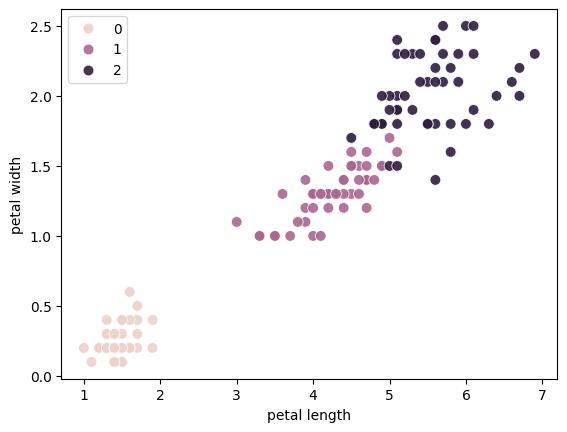

In [ ]:
# petal length X petal width plotting (two columm dataset plotting)
sns.scatterplot(x=X[:, 2], y=X[:, 3], hue=y, s=60, alpha=.9)
plt.xlabel("petal length")
plt.ylabel("petal width")
#plt.legend(iris.target_names)
plt.show()

We can visualize the Decision Tree using Matplotlib library

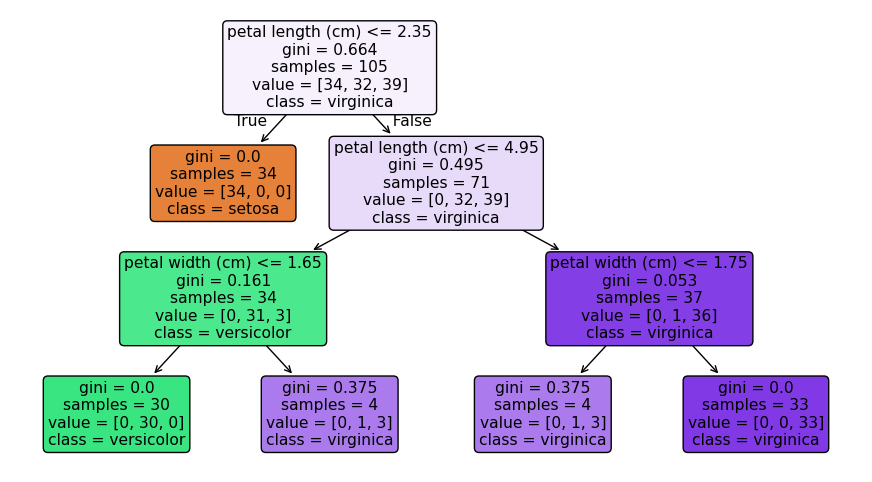

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the Decision Tree using Matplotlib
plt.figure(figsize=(11,6))
plot_tree(DecisionTree, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

As you can see, the plot shows the structure of the Decision Tree, with each node representing a decision based on the value of a feature, and each leaf node representing a class or numerical value. The color of each node indicates the majority class or value of the samples in that node, and the numbers at the bottom indicate the number of samples that reach that node.

Let’s see how the tree represented in Figure makes predictions. Suppose you find
an iris flower and you want to classify it. You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.35 cm. If it is, then you move down to the root’s left child node (depth 1, left). If not, move down rigth side, and so on. It’s really that simple.

In [ ]:
X_new = np.array([[3.5, 5, 5, 2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [ ]:
# Make prediction of new sample
prediction = DecisionTree.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris['target_names'][prediction]))

Prediction: [2]
Predicted target name: ['virginica']


##Exercícios
1. Modifique o critério de seleção dos ramos da ávore:
`criterion` : {"gini", "entropy", "log_loss"}, default="gini". The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "log_loss" and "entropy" both for the Shannon information gain. Compare os resultados.
1. Modifique o critério de profundidade dos ramos da ávore `max_depth` para 2, 4 e 5. Compare os resultados.
1. Train and fine-tune a Decision Tree for the moons dataset.
 - Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.
 - Split it into a training set (70%) and a test set (30%) using `train_test_split()`.
 - Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for `max_leaf_nodes`.
 - Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy.

##Referências
[1] https://www.datacamp.com/tutorial/decision-tree-classification-python

[2] https://medium.com/@chyun55555/decision-tree-classifier-with-scikit-learn-from-python-e83f38079fea

[3] https://www.tutorialspoint.com/machine_learning/machine_learning_decision_tree_algorithm.htm

[4] https://www.askpython.com/python/examples/decision-trees

[5] https://www.geeksforgeeks.org/decision-tree-introduction-example/

###Contribuições dos alunos

Contribuição de João Paulo Monteiro Santana <joao.paulo.santana@uel.br> 08/2024

In [ ]:
# Contribuição de João Paulo Monteiro Santana <joao.paulo.santana@uel.br> 08/2024
# Bibliotecas:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
# Tratando o Dataset
iris = load_iris()
x = iris.data
y = iris.target

target_names = iris.target_names

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris['target']

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Split e Treinamento
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

DecisionTree1 = DecisionTreeClassifier(criterion='gini', max_depth=3)
DecisionTree1.fit(x_train, y_train)

DecisionTree2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
DecisionTree2.fit(x_train, y_train)

DecisionTree3 = DecisionTreeClassifier(criterion='log_loss', max_depth=3)
DecisionTree3.fit(x_train, y_train)

print('\nDecision Tree Gini most important features')
for name, score in zip(iris["feature_names"], DecisionTree1.feature_importances_):
  print('Feature: %s, Score: %.2f%%' % (name, score*100))

print('\nDecision Tree Entropy most important features')
for name, score in zip(iris["feature_names"], DecisionTree2.feature_importances_):
  print('Feature: %s, Score: %.2f%%' % (name, score*100))

print('\nDecision Tree Log Loss most important features')
for name, score in zip(iris["feature_names"], DecisionTree3.feature_importances_):
  print('Feature: %s, Score: %.2f%%' % (name, score*100))


Decision Tree Gini most important features
Feature: sepal length (cm), Score: 0.00%
Feature: sepal width (cm), Score: 0.00%
Feature: petal length (cm), Score: 41.55%
Feature: petal width (cm), Score: 58.45%

Decision Tree Entropy most important features
Feature: sepal length (cm), Score: 0.00%
Feature: sepal width (cm), Score: 0.00%
Feature: petal length (cm), Score: 30.88%
Feature: petal width (cm), Score: 69.12%

Decision Tree Log Loss most important features
Feature: sepal length (cm), Score: 0.00%
Feature: sepal width (cm), Score: 0.00%
Feature: petal length (cm), Score: 33.01%
Feature: petal width (cm), Score: 66.99%


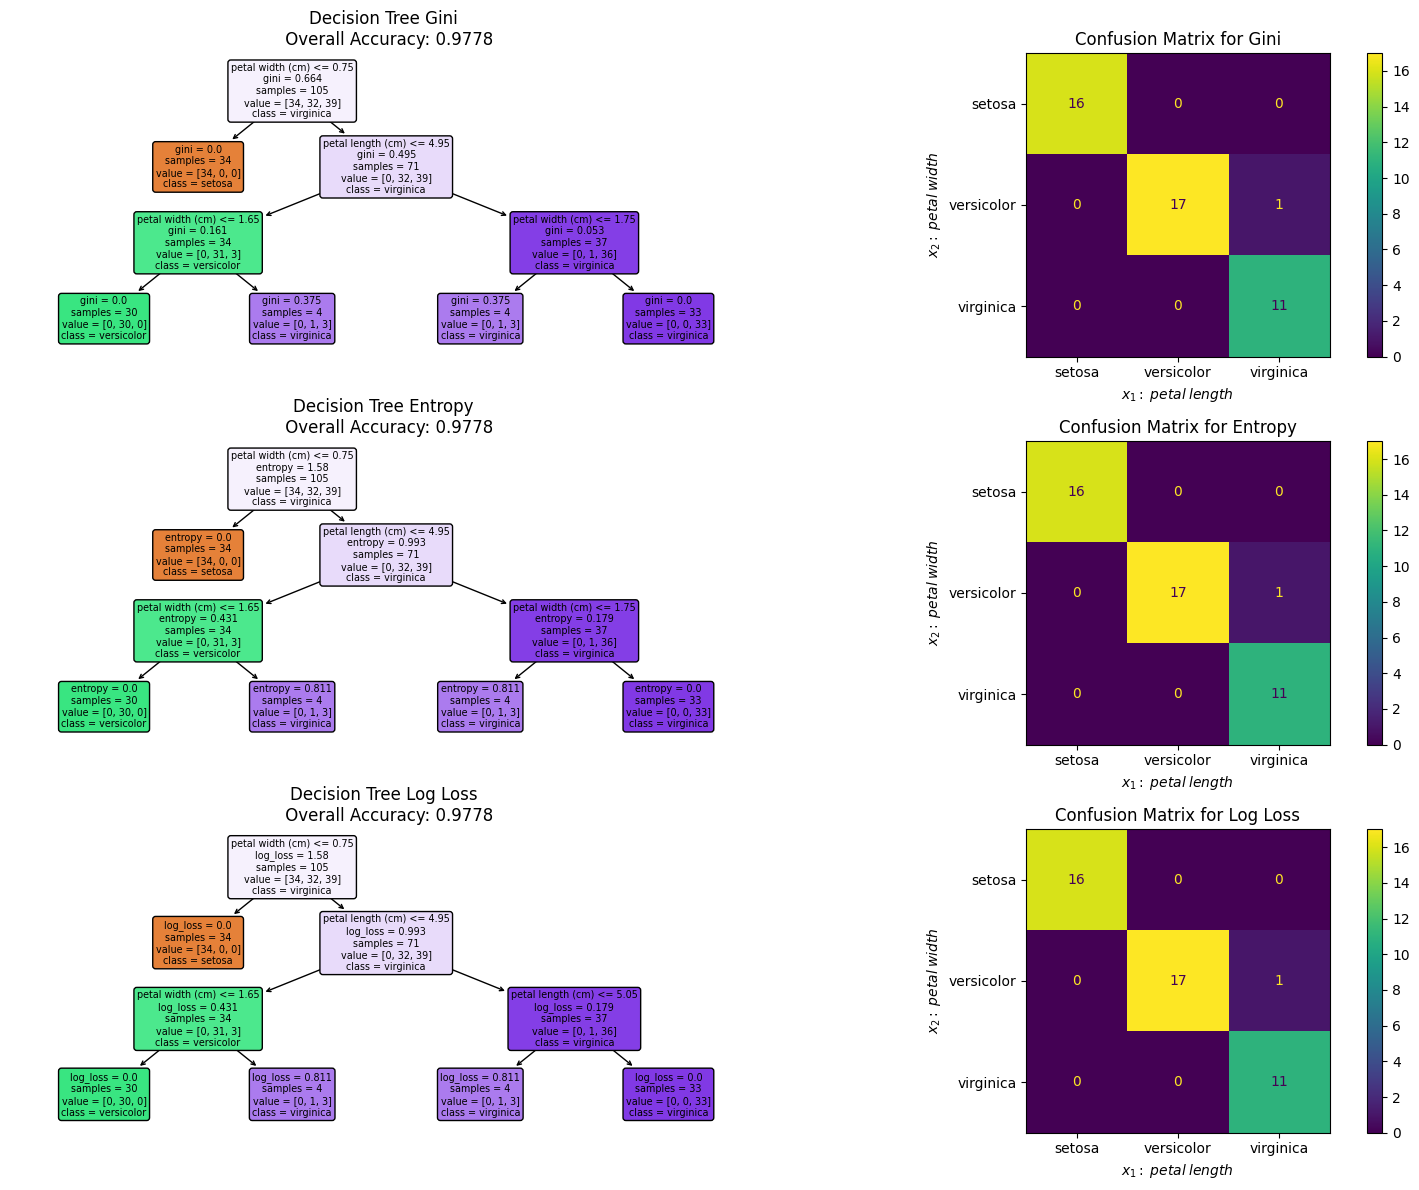

In [ ]:
# Teste e Resultados
y_pred1 = DecisionTree1.predict(x_test)
y_pred2 = DecisionTree2.predict(x_test)
y_pred3 = DecisionTree3.predict(x_test)

accuracy1 = np.sum(y_pred1 == y_test) / len(y_test)
accuracy2 = np.sum(y_pred2 == y_test) / len(y_test)
accuracy3 = np.sum(y_pred3 == y_test) / len(y_test)

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 12), tight_layout=True)

plot_tree(DecisionTree1, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axs[0,0])
axs[0,0].set_title(f'Decision Tree Gini \n Overall Accuracy: {accuracy1:.4f}')

cm1 = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=target_names)
disp.plot(ax=axs[0,1])
axs[0,1].set_title('Confusion Matrix for Gini')
axs[0,1].set_xlabel('$x_1:_ petal_ length$')
axs[0,1].set_ylabel('$x_2:_ petal_ width$')

plot_tree(DecisionTree2, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axs[1,0])
axs[1,0].set_title(f'Decision Tree Entropy \n Overall Accuracy: {accuracy2:.4f}')

cm2 = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=target_names)
disp.plot(ax=axs[1,1])
axs[1,1].set_title('Confusion Matrix for Entropy')
axs[1,1].set_xlabel('$x_1:_ petal_ length$')
axs[1,1].set_ylabel('$x_2:_ petal_ width$')

plot_tree(DecisionTree3, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axs[2,0])
axs[2,0].set_title(f'Decision Tree Log Loss \n Overall Accuracy: {accuracy3:.4f}')

cm3 = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=target_names)
disp.plot(ax=axs[2,1])
axs[2,1].set_title('Confusion Matrix for Log Loss')
axs[2,1].set_xlabel('$x_1:_ petal_ length$')
axs[2,1].set_ylabel('$x_2:_ petal_ width$')

plt.show()

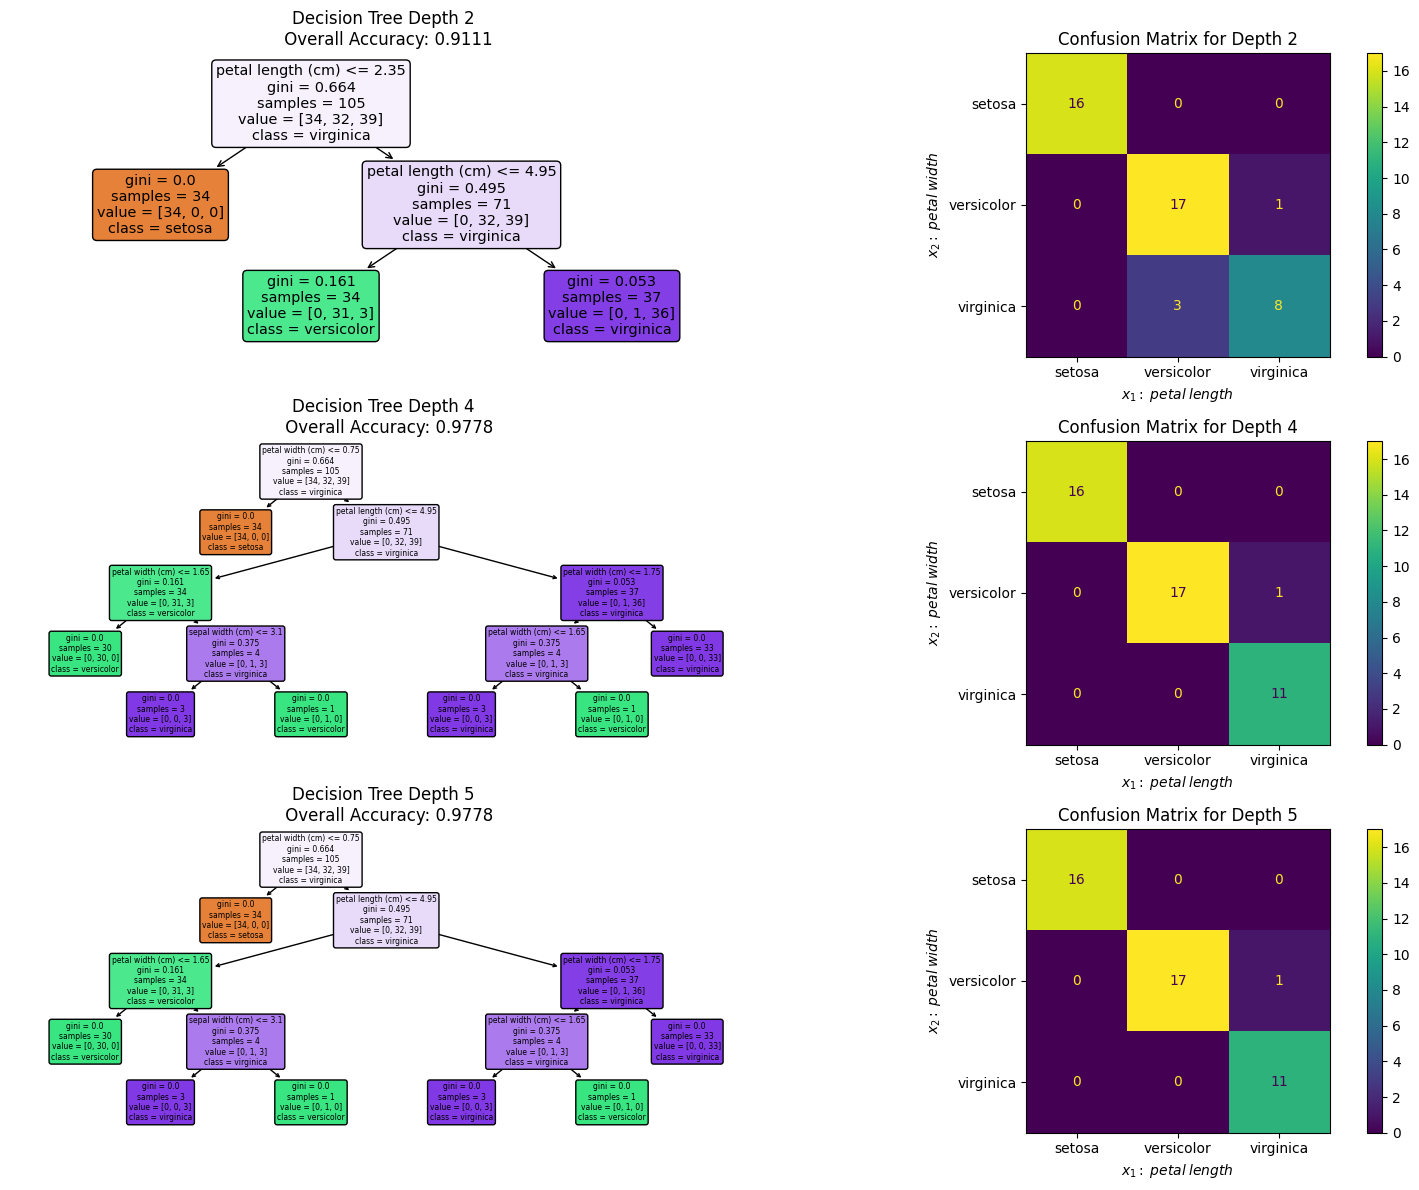

In [ ]:
# Split e Treinamento para Profundidades Diferentes
DecisionTree4 = DecisionTreeClassifier(criterion='gini', max_depth=2)
DecisionTree4.fit(x_train, y_train)

DecisionTree5 = DecisionTreeClassifier(criterion='gini', max_depth=4)
DecisionTree5.fit(x_train, y_train)

DecisionTree6 = DecisionTreeClassifier(criterion='gini', max_depth=5)
DecisionTree6.fit(x_train, y_train)

# Teste e Resultados
y_pred4 = DecisionTree4.predict(x_test)
y_pred5 = DecisionTree5.predict(x_test)
y_pred6 = DecisionTree6.predict(x_test)

accuracy4 = np.sum(y_pred4 == y_test) / len(y_test)
accuracy5 = np.sum(y_pred5 == y_test) / len(y_test)
accuracy6 = np.sum(y_pred6 == y_test) / len(y_test)

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 12), tight_layout=True)

plot_tree(DecisionTree4, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axs[0,0])
axs[0,0].set_title(f'Decision Tree Depth 2 \n Overall Accuracy: {accuracy4:.4f}')

cm4 = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=target_names)
disp.plot(ax=axs[0,1])
axs[0,1].set_title('Confusion Matrix for Depth 2')
axs[0,1].set_xlabel('$x_1:_ petal_ length$')
axs[0,1].set_ylabel('$x_2:_ petal_ width$')

plot_tree(DecisionTree5, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axs[1,0])
axs[1,0].set_title(f'Decision Tree Depth 4 \n Overall Accuracy: {accuracy5:.4f}')

cm5 = confusion_matrix(y_test, y_pred5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=target_names)
disp.plot(ax=axs[1,1])
axs[1,1].set_title('Confusion Matrix for Depth 4')
axs[1,1].set_xlabel('$x_1:_ petal_ length$')
axs[1,1].set_ylabel('$x_2:_ petal_ width$')

plot_tree(DecisionTree6, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, ax=axs[2,0])
axs[2,0].set_title(f'Decision Tree Depth 5 \n Overall Accuracy: {accuracy6:.4f}')

cm6 = confusion_matrix(y_test, y_pred6)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6, display_labels=target_names)
disp.plot(ax=axs[2,1])
axs[2,1].set_title('Confusion Matrix for Depth 5')
axs[2,1].set_xlabel('$x_1:_ petal_ length$')
axs[2,1].set_ylabel('$x_2:_ petal_ width$')

plt.show()

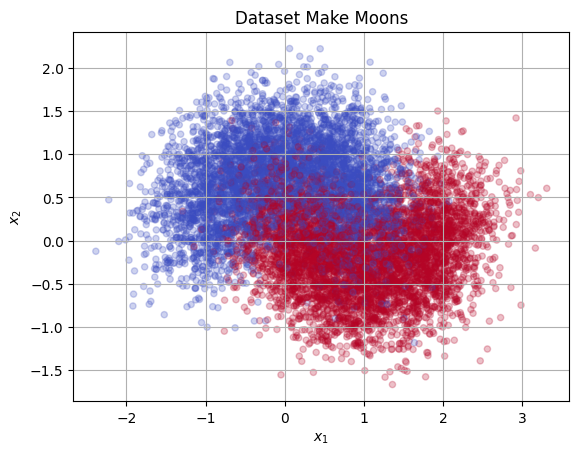

In [ ]:
# Exercício 3: Make Moons
moonsx, moonsy = make_moons(n_samples=10000, noise=0.4, random_state=42)

plt.scatter(moonsx[:,0], moonsx[:,1], c=moonsy, s=20, alpha=0.25, cmap='coolwarm')
plt.title('Dataset Make Moons')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid('minor')
plt.show()

In [ ]:
# Treinamento Make Moons

from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(moonsx, moonsy, test_size=0.3, random_state=0)

parameters = {'criterion':('gini', 'entropy', 'log_loss'), 'max_depth':[2, 3, 4, 5], 'max_leaf_nodes':[2, 3, 4, 5, 6, 7, 8, 9, 10]}
scores = 'precision'

grid = GridSearchCV(DecisionTreeClassifier(), parameters, scoring=scores, refit=True)
grid.fit(x_train, y_train)

print('Chosen Parameters:')
print(grid.best_params_)

Chosen Parameters:
{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 4}


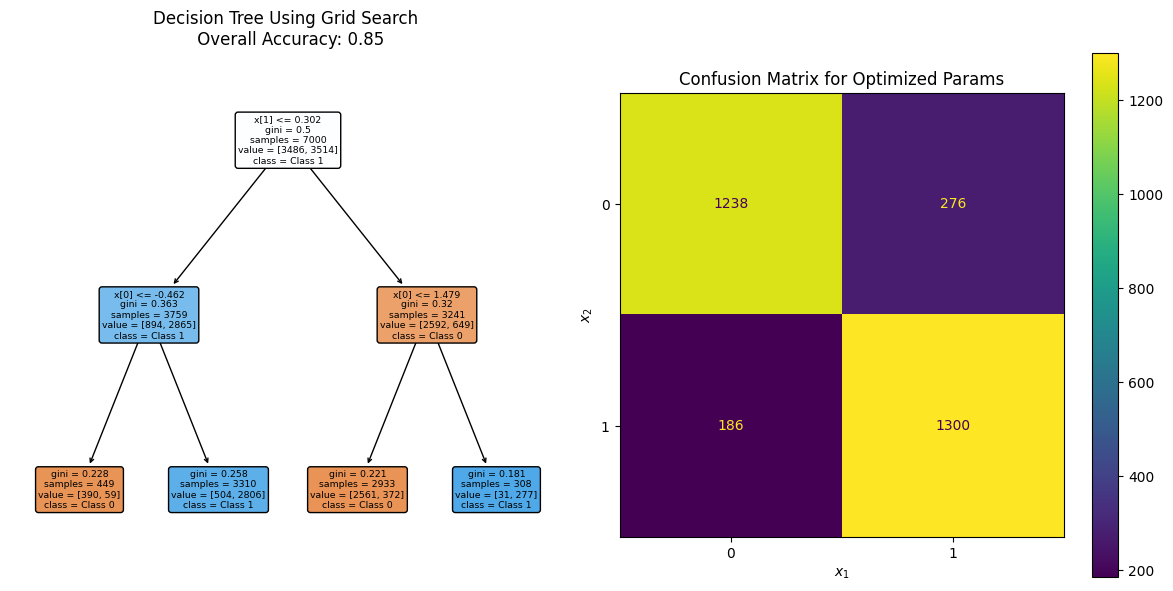

In [ ]:
# Teste e Resultados

DecisionTree = DecisionTreeClassifier(criterion='gini', max_depth=2, max_leaf_nodes=4)
DecisionTree.fit(x_train, y_train)

y_pred = DecisionTree.predict(x_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12,6), tight_layout=True)

plot_tree(DecisionTree, filled=True, rounded=True, class_names=['Class 0','Class 1'], ax=axs[0])
axs[0].set_title(f'Decision Tree Using Grid Search \n Overall Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix for Optimized Params')
axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')

plt.show()